In [2]:
#导入数据

import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
# 会自行下载，最好自己先将数据下载好，不然很慢而且不一定成功
mnist = input_data.read_data_sets("MNIST_data/",one_hot = True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


input shape: (55000, 784)
im.shape (28, 28)


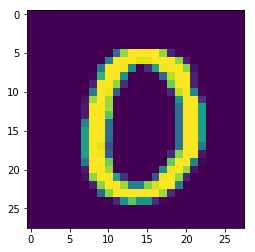

In [7]:
# 关于数据集的一些特性
print("input shape:",mnist.train.images.shape)
import pylab
im = mnist.train.images[10]
im = im.reshape(-1,28)
print("im.shape",im.shape)
pylab.imshow(im)
pylab.show()

In [8]:
# 输入数据 设置占位符

tf.reset_default_graph()
# 使用占位符用来输入测试数据
x = tf.placeholder(tf.float32,[None,784]) # 里面的None表示可以设置为任何长度的数据
y = tf.placeholder(tf.float32,[None,10])

In [9]:
# 构建模型

# 定义学习参数
# 设置为十个节点
W = tf.Variable(tf.random_normal([784,10]))
b = tf.Variable(tf.zeros([10]))
# 构建模型，利用softmax 作为激活函数
#  tf.matmul做矩阵的dot
# 最后输出一个概率的值
pred = tf.nn.softmax(tf.matmul(x,W)+b)

In [10]:
# 定一个损失函数

# tf.reduce_sum() 求和
# tf.reduce_mea 求平均值
# 使用交叉熵
cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred),reduction_indices=1))

# 定义optimizer，反向传播计算梯度并且更新参数
lr = 0.01
optimizer = tf.train.GradientDescentOptimizer(lr).minimize(cost)

In [14]:
# 开始训练模型

epochs = 25
batch_size = 100
display_step = 1

sess = tf.InteractiveSession()

sess.run(tf.global_variables_initializer())

for epoch in range(epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples/batch_size)
    
    for i in range(total_batch):
        batch_xs,batch_ys = mnist.train.next_batch(batch_size)
        
        _,c =sess.run([optimizer,cost],feed_dict = {x:batch_xs,y:batch_ys})
        
        avg_cost += c/total_batch
        
    if (epoch+1) % display_step == 0:
        print("Epoch:",(epoch+1),"cost=","{:.9f}".format(avg_cost))
        
print( " Finished!")

Epoch: 1 cost= 7.483330046
Epoch: 2 cost= 3.778994521
Epoch: 3 cost= 2.736918453
Epoch: 4 cost= 2.226314249
Epoch: 5 cost= 1.921271311
Epoch: 6 cost= 1.717587542
Epoch: 7 cost= 1.571083173
Epoch: 8 cost= 1.460413458
Epoch: 9 cost= 1.373417763
Epoch: 10 cost= 1.302548731
Epoch: 11 cost= 1.243836126
Epoch: 12 cost= 1.193931646
Epoch: 13 cost= 1.150768734
Epoch: 14 cost= 1.113102791
Epoch: 15 cost= 1.079618842
Epoch: 16 cost= 1.049720488
Epoch: 17 cost= 1.022872675
Epoch: 18 cost= 0.998265256
Epoch: 19 cost= 0.975826320
Epoch: 20 cost= 0.955225270
Epoch: 21 cost= 0.936228452
Epoch: 22 cost= 0.918566659
Epoch: 23 cost= 0.902070237
Epoch: 24 cost= 0.886666068
Epoch: 25 cost= 0.872323238
 Finished!


In [15]:
# 测试模型

correct_prediction = tf.equal(tf.argmax(pred,1),tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
print("acc:",accuracy.eval({x:mnist.test.images,y:mnist.test.labels}))

acc: 0.8338


In [16]:
# 保存模型
saver = tf.train.Saver()
savedir = "models/"
saver.save(sess,savedir+"MNIST_ANN01.cpkt")

'models/MNIST_ANN01.cpkt'